<a href="https://colab.research.google.com/github/Shk-aftab/AI/blob/master/chats_screenshot_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 70kB/s 
     |████████████████████████████████| 450kB 28.5MB/s 
     |████████████████████████████████| 3.8MB 38.6MB/s 
     |████████████████████████████████| 81kB 11.6MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense



Using TensorFlow backend.


In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,3,input_shape=(64,64,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
         directory='drive/My Drive/data set/chat_classification/training_set',
        target_size=(64, 64),
        batch_size=32,
        shuffle=True,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
         directory='drive/My Drive/data set/chat_classification/test_set',
        target_size=(64, 64),
        batch_size=32,
        shuffle=True,
        class_mode='binary') 

model.fit_generator(
        training_set,
        steps_per_epoch=527,
        epochs=6,
        validation_data=test_set,
        validation_steps=132)

model.save("model2.h5")

Found 704 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Epoch 1/6
527/527 [==============================] - 1684s 3s/step - loss: 0.0410 - accuracy: 0.9811 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 2/6
527/527 [==============================] - 1255s 2s/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0074 - val_accuracy: 0.9968
Epoch 3/6
527/527 [==============================] - 1258s 2s/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.4348 - val_accuracy: 0.9018
Epoch 4/6
527/527 [==============================] - 1260s 2s/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.2299 - val_accuracy: 0.9535
Epoch 5/6
527/527 [==============================] - 1258s 2s/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0337 - val_accuracy: 0.9869
Epoch 6/6
527/527 [==============================] - 1257s 2s/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0134 - val_accuracy: 0.9968


In [0]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import image
import numpy as np
import glob

In [0]:
def load_image(img_path, show=True):
    img_original = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(64, 64))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    if show:
        plt.imshow(img_original)                           
        plt.axis('off')
        plt.show()
    return img_tensor

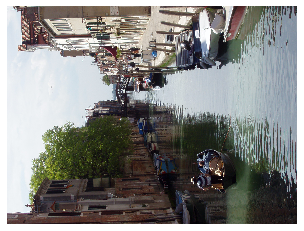

not chat


In [32]:
new_image = load_image("/content/drive/My Drive/data set/chat_classification/test_set/other/others (374).jpg")
pred = model.predict(new_image)        # predict() function may be used when flask is not used 
if pred<.5 : print("chat")
else : print("not chat")





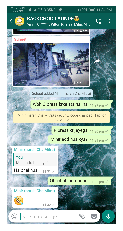

chat


In [33]:
new_image = load_image("/content/drive/My Drive/data set/chat_classification/test_set/chat/chat (188).jpg")
pred = model.predict(new_image)        # predict() function may be used when flask is not used 
if pred<.5 : print("chat")
else : print("not chat")